<div style="text-align: center; margin: 50px">

<h1 style="color: darkblue; background-color: white; text-align: center;">Qubit by Qubit - Semester 2</h1>
<h3>Week 17 Lab</h3>

</div>

# Overview 
1. [Lab part 1: Tensor products on numpy](#part1) <br>
2. [Lab part 2: Using QASM simulator to visualize Bell states](#part2) <br>
    a. [Creating the Phi- state](#part2a) <br>
    b. [Running the Phi- circuit using QASM](#part2b) <br>
3. [Key Takeaways](#part3) <br>
4. [Further Reading and Resources](#part4) <br>
5. [Optional Content](#part5) <br>
6. [Extra Reading on tensor products](#part6) <br>

<a id="part1"></a>
# Lab part 1: Tensor products on numpy

First, let us import all the libraries and function we will need. In addition to qiskit, we'll also use numpy in the first part of the lab.

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import numpy as np

Let's try out tensor products in numpy. We'll use the numpy function `np.kron(a,b)`, which computes the tensor product of vectors `a` and `b`. `kron` stands for Kronecker product, which is another name for the tensor product. 

Let's use this function to figure out the same tensor product we just computed by hand: $\begin{pmatrix}0\\1 \end{pmatrix} \otimes \begin{pmatrix}1\\0 \end{pmatrix} \otimes \begin{pmatrix}0\\1 \end{pmatrix} $. Also, keep in mind that we are using **right indexing** for the states, which means that the state of $q_0$ is right rightmost statevector, and the state of state of $q_2$ is right leftmost statevector.

In [2]:
q0 = np.array([[0],[1]]) 
q1 = np.array([[1],[0]])
q2 = np.array([[0],[1]])

q1q0 = np.kron(q1,q0)  #First, we find q1q0
q2q1q0 = np.kron(q2,q1q0) # Then, we find q2q1q0
# Alternatively, we can also directly use
#q2q1q0 = np.kron(np.kron(q2,q1),q0)
print(q2q1q0)

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


This is the same state we found mathematically! <br>
**Practice**: Find $\begin{pmatrix}1\\0 \end{pmatrix} \otimes \begin{pmatrix}1\\0 \end{pmatrix} \otimes \begin{pmatrix}0\\1 \end{pmatrix} $ using numpy

**HW tip** : Here, we used `kron(a,b)` to find the tensor product of statevectors. in the homework, you will be asked to create your own unitary gate, where you will use the same function `kron(a,b)` to find the tensor product of gates, i.e., matrices. The syntax remains exactly the same! Just define `a` and `b` as the matrices you want to find the tensor product for. Also, tensor products are associative, i.e., $A\otimes B \otimes C = (A\otimes B) \otimes C = A\otimes (B \otimes C)$, meaning that you can write this tensor product as `np.kron(np.kron(A,B),C)` or as `np.kron(A,np.kron(B,C))`. Both will return the same answer.

In [4]:
q3 = np.array([[1],[0]])
q4 = np.array([[1],[0]])
q5 = np.array([[0],[1]])

practice_q5q4q3 = np.kron((q5,q4),q3)
print(practice_q5q4q3)

[[[0]
  [0]
  [1]
  [0]]

 [[1]
  [0]
  [0]
  [0]]]


<a id="part2"></a>
# Lab part 2: Using QASM simulator to visualize Bell states

### Note on simulators

Today, we will be using the **QASM simulator** as our backend, instead of the statevector simulator that we had used last week. The QASM simulator performs measurements on the circuit, so we need to add classical bits and measurements to our circuit. QASM allows us to add noise to the circuit output, making the simulation more realistic.

<a id="part2a"></a>
## Making the Phi- state

In the lab last week, we created $|\phi^+\rangle$, one of the four **Bell States**. Today we will create $|\phi^-\rangle$. Recall that there are four Bell states:

$$|\phi^+\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle+|11\rangle\big)$$
$$|\phi^-\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle-|11\rangle\big)$$
$$|\psi^+\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle+|10\rangle\big)$$
$$|\psi^-\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle-|10\rangle\big)$$

These states are examples of **two-qubit entangled states**. These entangled states carry two types of information - **parity** and **phase**. **Parity** refers to whether the two qubits, when measured, would return the same value or not. We can see that for the $|\phi^+\rangle$ and $|\phi^-\rangle$ states, both qubits are either 0, or both qubits are 1. For the $|\psi^+\rangle$ and $|\psi^-\rangle$, the two qubits are opposite - if one of them is 1, the other is 0. **Phase** refers to the sign between the two superposed two-qubit states. For $|\phi^+\rangle$ and $|\psi^+\rangle$ this sign is +, whereas for $|\phi^-\rangle$ and $|\psi^-\rangle$ it is -.

The difference between $|\phi^-\rangle$ and $|\phi^+\rangle$ is the sign (or the phase) between the two superposed states. Somehow, we need to flip the sign of the $|11\rangle$ part of the superposition, without changing the $|00\rangle$ part in any way. How can we do this?

Do we know of any gate that affects $|1\rangle$ but leaves $|0\rangle$ unchanged? Yes! The Z gate does exactly this - it gives $|1\rangle$ a negative sign, and leaves $|0\rangle$ unchanged.

We'll make our $|\phi^-\rangle$ state in three steps. First, just as in the $|\phi^+\rangle$ circuit, we'll put $q_0$ in a superposition state:

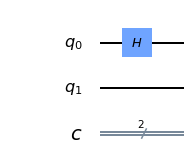

In [12]:
circ_phiminus = QuantumCircuit(2,2)
circ_phiminus.h(0)
circ_phiminus.draw('mpl')

Now, we know that $|q_0\rangle=(|0\rangle+|1\rangle)/\sqrt(2)$. Next, we will apply a Z gate to $q_0$, to flip the sign of the $|1\rangle$ part, such that $|q_0\rangle=(|0\rangle-|1\rangle)/\sqrt(2)$.

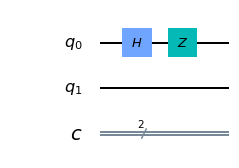

In [13]:
circ_phiminus.z(0) #Applying a Z gate to qubit 0
circ_phiminus.draw('mpl')

We're almost done! Now, we can apply a CNOT gate to create the entangled state, and add measurements in the same way as before.

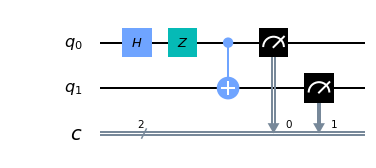

In [5]:
circ_phiminus.cx(0,1) #adding CNOT gate with qubit 0 as control and qubit 1 as target
circ_phiminus.measure([0,1],[0,1]) # Since we will use the QASM simulator, we have to add measurements.
circ_phiminus.draw('mpl')

<a id="part2b"></a>
## Running the phi- circuit
We're done! Let's run this circuit using the QASM simulator. Since we're using the QASM simulator, we'll also need to specify how many times we want to run the circuit, i.e., how many **shots** we want to use. Remember that we're simulating actual measurements on circuits here, and measurements are inherently noisy. Therefore, we do a lot of them to get good statistics on the possible outputs of our quantum circuit.

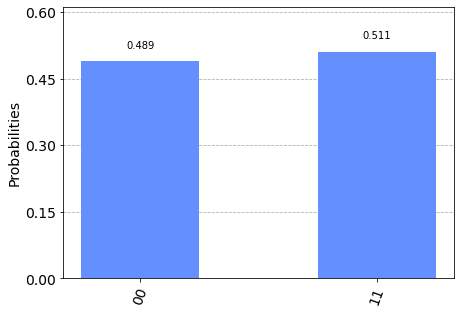

In [6]:
backend = Aer.get_backend('qasm_simulator')  # specifying that we will use qasm simulator
job = execute(circ_phiminus, backend, shots = 1024)  # shots=1024 specifies that the circuit will be run 1024 times
result = job.result()
# getting the counts, i.e., the fraction of times the circuit gave all the possible results
counts = result.get_counts(circ_phiminus)  
graph = plot_histogram(counts)
display(graph)

The measurement probabilities are still the same as the phi+ state, since the phase on the $|11\rangle$ does not affect its measurement probability. We can quickly use statevector simulator to check that we made the phi- state. We'll need to re-define our circuit, since we have to remove the classical bits and measurements before using statevector simulator.

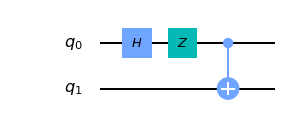

In [7]:
circ_phiminus = QuantumCircuit(2)
circ_phiminus.h(0)
circ_phiminus.z(0)
circ_phiminus.cx(0,1)
circ_phiminus.draw('mpl')

In [8]:
backend = Aer.get_backend('statevector_simulator')  # specifying that we will use statevector simulator
job = execute(circ_phiminus, backend)  # Don't have to specify shots
result = job.result()
statevector = result.get_statevector(circ_phiminus)
print(statevector)

[ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]


The last entry in the statevector, which corresponds to $|11\rangle$, now has a negative sign! We successfully made the phi- state.

We just went through the process of designing a circuit to generate a desired output state. Here are the steps we followed:

1. We started off analyzing the features final quantum state we want to generate
2. We decided which gates we needed to produce those features
3. We implemented a circuit with those gates to transform the initial state into the desired final state
4. We tested the circuit through simulations

This is typically the process one follows while designing quantum circuits - we work backwards from the desired final state, and think about the gates we will need to generate that final state from the initial state. As you gain more experience with the action of different combinations of gates, you will be able to start thinking in terms of 'chunks' or 'blocks' of gates instead of individual gates to generate quantum circuits. **We are just getting started!**

<a id="part3"></a>
# Key Takeaways

1. Tensor products are used to form the statevectors for multi-qubit states. Tensor products essentially tell you all the possible combinations of the vectors.

2. QASM simulator requires classical bits and measurements to be present in the circuit, unlike statevector simulator

3. To make the phi- Bell state, we first use an H gate followed by a Z gate to flip the sign of the $|1\rangle$ part of the superposition, before applying the CNOT gate.

 <a id="part4"></a>
 # Further reading and resources
 
 [Tensor products demystified](https://www.math3ma.com/blog/the-tensor-product-demystified)
 
 [Lecture on tensor products and 2 qubit gates](https://www.youtube.com/watch?v=xzG6c96PsLs)
 
 [More on bell states](https://www.quantiki.org/wiki/bell-state)
 
 [Introductory notes on quantum computing](https://www.cl.cam.ac.uk/~mgk25/quantum.pdf)
 
 [QC lectures from Prof. John Preskill](https://www.youtube.com/watch?v=w08pSFsAZvE&list=PL0ojjrEqIyPy-1RRD8cTD_lF1hflo89Iu&index=1)
 
 
 
 

<a id="part5"></a>
# Optional content - Circuit Composer widget

IBM recently added Circuit Composer as an importable widget on Jupyter notebooks! This widget lets you create cicruits using the drag-and-drop circuit composer, and additionally generates the qiskit code for the circuit live.

**Disclaimer**: This widget works smoothly in IQX's Quantum Lab environment. Akshay managed to get it to work on his local Jupyter environment (a numpy update was required), but could not get it to work with Google Colab.

First, let us import the widget.

In [9]:
from ibm_quantum_widgets import CircuitComposer

ModuleNotFoundError: No module named 'ibm_quantum_widgets'

Next, let's launch it and use it!

In [ ]:
CircuitComposer()

In [ ]:
# This code is being generated automatically by the IBM Quantum Circuit Composer widget.
# It changes in every update of the widget, so any modifications done in this cell will be lost.
# State: synchronized

# Attention:
# ----------
# Custom gates are not supported yet in version v1.0.3
# Find following an equivalent qasm based circuit:
from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[2];
creg c[2];

h q[0];
ccx undefined,q[0],q[1];
"""
circuit = QuantumCircuit.from_qasm_str(qasm)

In [ ]:
# This code is being generated automatically by the IBM Quantum Circuit Composer widget.
# It changes in every update of the widget, so any modifications done in this cell will be lost.
# State: synchronized

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])

You still need to define a backend and run the circuit in code, but using this widget, you can drag and drop your gates and the circuit gets coded for you!

<a id="part6"></a>
# Extra reading - more practice with tensor products (strictly optional!!)

### Tensor products
We saw last week that a 2-qubit state can be represented with 4 basis vectors: $|00\rangle, |01\rangle, |10\rangle, \textrm{and } |11\rangle.$ We also saw how the statevector now has 4 entries: the statevector for a general state $|\psi\rangle = \alpha|00\rangle +\beta|01\rangle +\gamma|10\rangle +\delta|11\rangle$ is given by $|\psi\rangle=\begin{pmatrix}\alpha \\ \beta \\ \gamma \\ \delta\end{pmatrix}$. 

Formally, the way we form the basis states for multi-qubit states by using the **tensor product**. Given qubit 0 with state $|\psi_0\rangle = c_1|0\rangle +c_2|1\rangle$ and qubit 1 with state $|\psi_1\rangle = c_3|0\rangle +c_4|1\rangle$, the combined state of the two qubits is represented by 
$$ |\psi\rangle = |\psi_1\rangle \otimes |\psi_0\rangle$$
$$ |\psi\rangle = (c_3|0\rangle +c_4|1\rangle)\otimes(c_1|0\rangle +c_2|1\rangle)$$
$$ |\psi\rangle = c_3c_1|0\rangle \otimes |0\rangle +c_3c_2|0\rangle \otimes |1\rangle+c_4c_1|1\rangle \otimes |0\rangle+c_4c_2|1\rangle \otimes |1\rangle$$
Which is the same as our earlier expression for the two-qubit state, except we are now explicitly showing the tensor product between the basis states of the two qubits.

Can we use this formalism to also generate the statevectors? Yes! For example, consider the tensor product $ |0\rangle \otimes |1\rangle$. This can be expanded as:
$$\begin{align} 
|0\rangle \otimes |1\rangle &= \begin{pmatrix}  1 \\0 \end{pmatrix} \otimes \begin{pmatrix}  0 \\1 \end{pmatrix} \\
 &= \begin{pmatrix}  1 \begin{pmatrix} 0 \\ 1 \end{pmatrix} \\ 0 \begin{pmatrix} 0 \\ 1 \end{pmatrix}\end{pmatrix} \\
 &= \begin{pmatrix}  0 \\ 1\\ 0\\ 0 \end{pmatrix}
 \end{align}$$

**Question:** What is the statevector representation of the tensor product $ |1\rangle \otimes |1\rangle$ ?

Now we can think about how a gate would apply to a qubit in a multi-qubit vector. Let's consider the X gate. Fortunately, the rule is quite simple; just as we used the tensor product to calculate multi-qubit statevectors, we use the tensor product to calculate matrices that act on these statevectors. For example, in the circuit below:

In [ ]:
qc_2 = QuantumCircuit(2)
qc_2.h(0)
qc_2.x(1)
qc_2.draw('mpl')

We can represent the simultaneous operations (H & X) using their tensor product:

$$X|q_1\rangle\otimes H|q_0\rangle=(X\otimes H)|q_1q_0\rangle$$

The operation looks like this:

$$
\begin{align}
X\otimes H &=\begin{bmatrix}
              0 & 1 \\
              1 & 0
             \end{bmatrix}
             \otimes
             \tfrac{1}{\sqrt{2}}
             \begin{bmatrix}
              1 & 1 \\
              1 & -1
             \end{bmatrix} \\
             \\
           &=\frac{1}{\sqrt{2}}
             \begin{bmatrix}
              0   \begin{bmatrix}
                   1 & 1 \\
                   1 & -1
                  \end{bmatrix}
              & 1 \begin{bmatrix}
                   1 & 1 \\
                   1 & -1
                  \end{bmatrix} \\
              1   \begin{bmatrix}
                   1 & 1 \\
                   1 & -1
                  \end{bmatrix}
              & 0 \begin{bmatrix}
                   1 & 1 \\
                   1 & -1
                  \end{bmatrix}
             \end{bmatrix}\\
             \\
           &=\frac{1}{\sqrt{2}}
             \begin{bmatrix}
              0 & 0 & 1 & 1 \\
              0 & 0 & 1 & -1 \\
              1 & 1 & 0 & 0 \\
              1 & -1 & 0 & 0
             \end{bmatrix}
\end{align}
$$

Which we can then apply to our 4D statevector $|q_1q_0\rangle$.

$$
|q_1q_0\rangle = |q_1\rangle\otimes|q_0\rangle=  \begin{bmatrix}
                                                  1 \\
                                                  0
                                                 \end{bmatrix}
                                                 \otimes
                                                 \begin{bmatrix}
                                                  1 \\
                                                  0
                                                 \end{bmatrix} = 
                                                 \begin{bmatrix}
                                                  1 \\
                                                  0 \\
                                                  0 \\
                                                  0 \\
                                                 \end{bmatrix}
$$

Thus,

$$
\begin{align}
(X\otimes H)|q_1q_0\rangle &=\frac{1}{\sqrt{2}}
                             \begin{bmatrix}
                              0 & 0 & 1 & 1 \\
                              0 & 0 & 1 & -1 \\
                              1 & 1 & 0 & 0 \\
                              1 & -1 & 0 & 0
                             \end{bmatrix}
                             \begin{bmatrix}
                              1 \\
                              0 \\
                              0 \\
                              0 \\
                             \end{bmatrix}\\
                             \\
                           &=\frac{1}{\sqrt{2}}
                             \begin{bmatrix}
                              0 \\
                              0 \\
                              1 \\
                              1 \\
                             \end{bmatrix}
\end{align}
$$



If we want to apply a gate to only one qubit at a time (such as in the circuit below), we do the tensor product with the identity matrix, e.g.: $X\otimes I$

In [ ]:
qc_xi = QuantumCircuit(2)
qc_xi.x(1)
qc_xi.draw('mpl')

**Question:** How would the matrix of this quantum circuit look like?

ANS:

$$
\begin{align}
X\otimes I &=\begin{bmatrix}
              0 & 1 \\
              1 & 0
             \end{bmatrix}
             \otimes
             \begin{bmatrix}
              1 & 0 \\
              0 & 1
             \end{bmatrix} \\
             \\
           &=\begin{bmatrix}
              0   \begin{bmatrix}
                   1 & 0 \\
                   0 & 1
                  \end{bmatrix}
              & 1 \begin{bmatrix}
                   1 & 0 \\
                   0 & 1
                  \end{bmatrix} \\
              1   \begin{bmatrix}
                   1 & 0 \\
                   0 & 1
                  \end{bmatrix}
              & 0 \begin{bmatrix}
                   1 & 0 \\
                   0 & 1
                  \end{bmatrix}
             \end{bmatrix}\\
             \\
           &=\begin{bmatrix}
              0 & 0 & 1 & 0 \\
              0 & 0 & 0 & 1 \\
              1 & 0 & 0 & 0 \\
              0 & 1 & 0 & 0
             \end{bmatrix}
\end{align}
$$

<a id="part3a"></a>
## Control-NOT Gate

This gate is a conditional gate that performs an X gate on the second qubit (**target**), if the state of the first qubit (**control**) is $|1\rangle$. The gate is drawn on a circuit like this, with `q0` as the control and `q1` as the target:

In [ ]:
qc_cnot = QuantumCircuit(2)
# Apply CNOT
qc_cnot.cx(0,1)
# See the circuit:
qc_cnot.draw('mpl')

When our qubits are not in superposition of $|0\rangle$ or $|1\rangle$ (behaving as classical bits), this gate is very simple and intuitive to understand. We can use the classical truth table:

| Input(t,c) | Outpt(t,c) |
|:----------:|:----------:|
| 00 | 00 |
| 01 | 11 |
| 10 | 10 |
| 11 | 01 |

And acting on our 4D-statevector, it has one of the two matrices:

$$
\mbox{CNOT}= \begin{bmatrix}
              1 & 0 & 0 & 0 \\
              0 & 0 & 0 & 1 \\
              0 & 0 & 1 & 0 \\
              0 & 1 & 0 & 0
            \end{bmatrix}
\; \; \; \; \; , \; \; \; \; \;
\mbox{CNOT}= \begin{bmatrix}
              1 & 0 & 0 & 0 \\
              0 & 1 & 0 & 0 \\
              0 & 0 & 0 & 1 \\
              0 & 0 & 1 & 0
            \end{bmatrix}
$$

Depending on which qubit is the control and which is the target. Different books, simulators and papers order their qubits differently. In our case, the left matrix corresponds to the CNOT in the circuit above.

We have seen how this acts on classical states, but let’s now see how it acts on a qubit in superposition. We will put one qubit in the state $|+\rangle$:

In [ ]:
qc_hcnot = QuantumCircuit(2)
# Apply H-gate to the first qubit to generate the |+> state
qc_hcnot.h(0)
qc_hcnot.draw('mpl')

This produces the state $|0\rangle\otimes|+\rangle=|0+\rangle$:

$$
|0+\rangle=\tfrac{1}{\sqrt{2}}\big(|00\rangle+|01\rangle\big)
$$

And let’s see what happens when we apply the CNOT gate using `cx`:

In [ ]:
qc_hcnot.cx(0,1)
qc_hcnot.draw('mpl')

Which give us the sate:

$$
\mbox{CNOT} \; |0+\rangle=\tfrac{1}{\sqrt{2}}\big(|00\rangle+|11\rangle\big)
$$

This state is very interesting to us, because it is *entangled*.

<a id="part3b"></a>
## SWAP Gate

Sometimes we need to move information around in a quantum computer. For some qubit implementations, this could be done by physically moving them. Another option is simply to move the state between two qubits. This is done by the SWAP gate.

In [ ]:
a = 0
b = 1

qc_s = QuantumCircuit(2)
# swaps states of qubits a and b
qc_s.swap(a,b)
qc_s.draw('mpl')

It is represented by the matrix:

$$
\mbox{SWAP} =   \begin{bmatrix}
                  1 & 0 & 0 & 0 \\
                  0 & 0 & 1 & 0 \\
                  0 & 1 & 0 & 0 \\
                  0 & 0 & 0 & 1
                \end{bmatrix}
$$